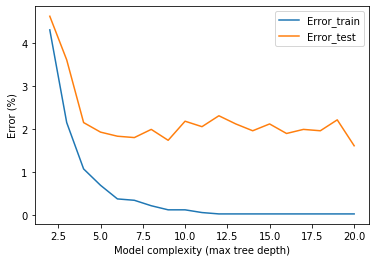

Ran Exercise 6.1.1


In [1]:
# exercise 6.1.1

from matplotlib.pylab import figure, plot, xlabel, ylabel, legend, show
from scipy.io import loadmat
from sklearn import model_selection, tree
import numpy as np

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/wine2.mat')
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

# Tree complexity parameter - constraint on maximum depth
tc = np.arange(2, 21, 1)

# Simple holdout-set crossvalidation
test_proportion = 0.5
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=test_proportion)

# Initialize variables
Error_train = np.empty((len(tc),1))
Error_test = np.empty((len(tc),1))

for i, t in enumerate(tc):
    # Fit decision tree classifier, Gini split criterion, different pruning levels
    dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=t)
    dtc = dtc.fit(X_train,y_train)

    # Evaluate classifier's misclassification rate over train/test data
    y_est_test = np.asarray(dtc.predict(X_test),dtype=int)
    y_est_train = np.asarray(dtc.predict(X_train), dtype=int)
    misclass_rate_test = sum(y_est_test != y_test) / float(len(y_est_test))
    misclass_rate_train = sum(y_est_train != y_train) / float(len(y_est_train))
    Error_test[i], Error_train[i] = misclass_rate_test, misclass_rate_train
    
f = figure()
plot(tc, Error_train*100)
plot(tc, Error_test*100)
xlabel('Model complexity (max tree depth)')
ylabel('Error (%)')
legend(['Error_train','Error_test'])
    
show()    

print('Ran Exercise 6.1.1')

Computing CV fold: 1/10..
Computing CV fold: 2/10..
Computing CV fold: 3/10..
Computing CV fold: 4/10..
Computing CV fold: 5/10..
Computing CV fold: 6/10..
Computing CV fold: 7/10..
Computing CV fold: 8/10..
Computing CV fold: 9/10..
Computing CV fold: 10/10..


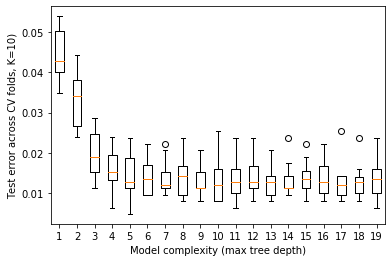

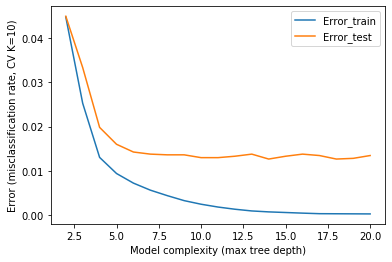

Ran Exercise 6.1.2


In [2]:
# exercise 6.1.2

from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, show, boxplot
from scipy.io import loadmat
from sklearn import model_selection, tree
import numpy as np

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/wine2.mat')
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

# Tree complexity parameter - constraint on maximum depth
tc = np.arange(2, 21, 1)

# K-fold crossvalidation
K = 10
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variable
Error_train = np.empty((len(tc),K))
Error_test = np.empty((len(tc),K))

k=0
for train_index, test_index in CV.split(X):
    print('Computing CV fold: {0}/{1}..'.format(k+1,K))

    # extract training and test set for current CV fold
    X_train, y_train = X[train_index,:], y[train_index]
    X_test, y_test = X[test_index,:], y[test_index]

    for i, t in enumerate(tc):
        # Fit decision tree classifier, Gini split criterion, different pruning levels
        dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=t)
        dtc = dtc.fit(X_train,y_train.ravel())
        y_est_test = dtc.predict(X_test)
        y_est_train = dtc.predict(X_train)
        # Evaluate misclassification rate over train/test data (in this CV fold)
        misclass_rate_test = np.sum(y_est_test != y_test) / float(len(y_est_test))
        misclass_rate_train = np.sum(y_est_train != y_train) / float(len(y_est_train))
        Error_test[i,k], Error_train[i,k] = misclass_rate_test, misclass_rate_train
    k+=1

    
f = figure()
boxplot(Error_test.T)
xlabel('Model complexity (max tree depth)')
ylabel('Test error across CV folds, K={0})'.format(K))

f = figure()
plot(tc, Error_train.mean(1))
plot(tc, Error_test.mean(1))
xlabel('Model complexity (max tree depth)')
ylabel('Error (misclassification rate, CV K={0})'.format(K))
legend(['Error_train','Error_test'])
    
show()

print('Ran Exercise 6.1.2')

Cross validation fold 1/5
Train indices: [ 1  2  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 24 25 26 28 29]
Test indices: [ 0  3  8 22 23 27]
Features no: 9

Cross validation fold 2/5
Train indices: [ 0  2  3  4  5  6  7  8 10 11 12 13 14 15 18 19 21 22 23 24 26 27 28 29]
Test indices: [ 1  9 16 17 20 25]
Features no: 3

Cross validation fold 3/5
Train indices: [ 0  1  2  3  5  6  7  8  9 11 12 16 17 18 19 20 22 23 24 25 26 27 28 29]
Test indices: [ 4 10 13 14 15 21]
Features no: 8

Cross validation fold 4/5
Train indices: [ 0  1  2  3  4  6  8  9 10 12 13 14 15 16 17 18 20 21 22 23 25 26 27 29]
Test indices: [ 5  7 11 19 24 28]
Features no: 6

Cross validation fold 5/5
Train indices: [ 0  1  3  4  5  7  8  9 10 11 13 14 15 16 17 19 20 21 22 23 24 25 27 28]
Test indices: [ 2  6 12 18 26 29]
Features no: 9



Linear regression without feature selection:

- Training error: 1.0339252785933506e-25
- Test error:     3952.3570408423025
- R^2 train:     1.0
- R^2 test:     -64.82964521

ValueError: num must be 1 <= num <= 2, not 3

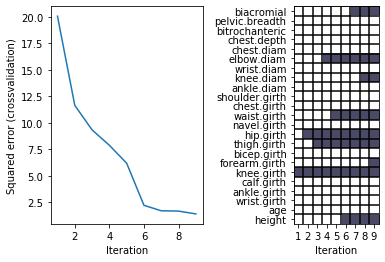

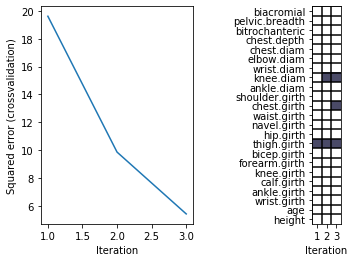

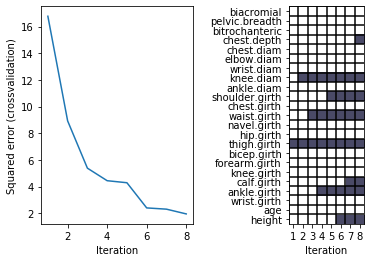

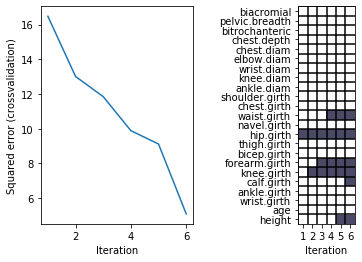

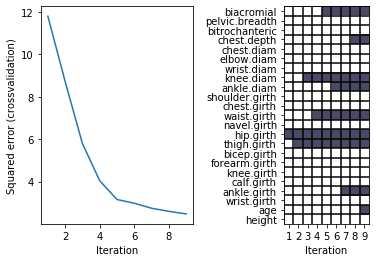

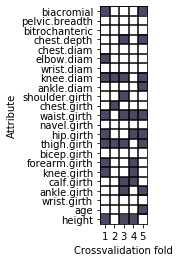

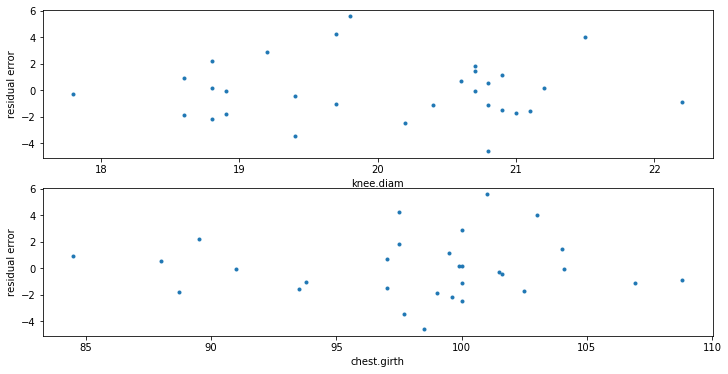

In [3]:
# exercise 6.2.1
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from toolbox_02450 import feature_selector_lr, bmplot
import numpy as np

# Load data from matlab file
mat_data = loadmat('02450_toolbox/Data/body.mat')
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
N, M = X.shape


## Crossvalidation
# Create crossvalidation partition for evaluation
K = 5
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k=0
for train_index, test_index in CV.split(X):
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    internal_cross_validation = 10
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]

    # Compute squared error with all features selected (no feature selection)
    m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Compute squared error with feature subset selection
    textout = ''
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,display=textout)
    
    Features[selected_features,k] = 1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) == 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs[k] = np.square(y_train-m.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs[k] = np.square(y_test-m.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
    
        figure(k)
        subplot(1,2,1)
        plot(range(1,len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Squared error (crossvalidation)')    
        
        subplot(1,3,3)
        bmplot(attributeNames, range(1,features_record.shape[1]), -features_record[:,1:])
        clim(-1.5,0)
        xlabel('Iteration')

    print('Cross validation fold {0}/{1}'.format(k+1,K))
    print('Train indices: {0}'.format(train_index))
    print('Test indices: {0}'.format(test_index))
    print('Features no: {0}\n'.format(selected_features.size))

    k+=1


# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))

figure(k)
subplot(1,3,2)
bmplot(attributeNames, range(1,Features.shape[1]+1), -Features)
clim(-1.5,0)
xlabel('Crossvalidation fold')
ylabel('Attribute')


# Inspect selected feature coefficients effect on the entire dataset and
# plot the fitted model residual error as function of each attribute to
# inspect for systematic structure in the residual

f=2 # cross-validation fold to inspect
ff=Features[:,f-1].nonzero()[0]
if len(ff) == 0:
    print('\nNo features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
else:
    m = lm.LinearRegression(fit_intercept=True).fit(X[:,ff], y)
    
    y_est= m.predict(X[:,ff])
    residual=y-y_est
    
    figure(k+1, figsize=(12,6))
    title('Residual error vs. Attributes for features selected in cross-validation fold {0}'.format(f))
    for i in range(0,len(ff)-1):
       subplot(2, int( np.ceil(len(ff) // 2)),i+1)
       plot(X[:,ff[i]],residual,'.')
       xlabel(attributeNames[ff[i]])
       ylabel('residual error')
    
    
show()

print('Ran Exercise 6.2.1')

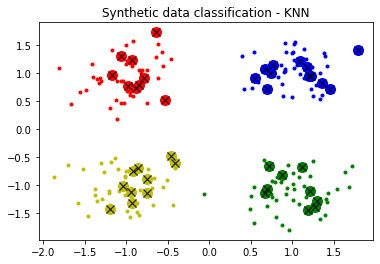

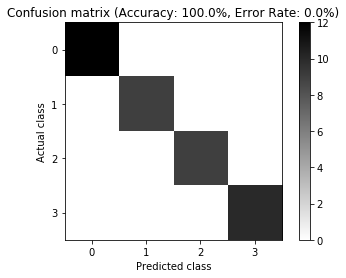

Ran Exercise 6.3.1


In [5]:
# exercise 6.3.1

from matplotlib.pyplot import (figure, plot, title, xlabel, ylabel, 
                               colorbar, imshow, xticks, yticks, show)
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.metrics import confusion_matrix
from numpy import cov

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/synth1.mat') # <-- change the number to change dataset
X = mat_data['X']
X_train = mat_data['X_train']
X_test = mat_data['X_test']
y = mat_data['y'].squeeze()
y_train = mat_data['y_train'].squeeze()
y_test = mat_data['y_test'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)


# Plot the training data points (color-coded) and test data points.
figure(1)
styles = ['.b', '.r', '.g', '.y']
for c in range(C):
    class_mask = (y_train==c)
    plot(X_train[class_mask,0], X_train[class_mask,1], styles[c])


# K-nearest neighbors
K=5

# Distance metric (corresponds to 2nd norm, euclidean distance).
# You can set dist=1 to obtain manhattan distance (cityblock distance).
dist=2
metric = 'minkowski'
metric_params = {} # no parameters needed for minkowski

# You can set the metric argument to 'cosine' to determine the cosine distance
#metric = 'cosine' 
#metric_params = {} # no parameters needed for cosine

# To use a mahalonobis distance, we need to input the covariance matrix, too:
#metric='mahalanobis'
#metric_params={'V': cov(X_train, rowvar=False)}

# Fit classifier and classify the test points
knclassifier = KNeighborsClassifier(n_neighbors=K, p=dist, 
                                    metric=metric,
                                    metric_params=metric_params)
knclassifier.fit(X_train, y_train)
y_est = knclassifier.predict(X_test)


# Plot the classfication results
styles = ['ob', 'or', 'og', 'oy']
for c in range(C):
    class_mask = (y_est==c)
    plot(X_test[class_mask,0], X_test[class_mask,1], styles[c], markersize=10)
    plot(X_test[class_mask,0], X_test[class_mask,1], 'kx', markersize=8)
title('Synthetic data classification - KNN');

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_est);
accuracy = 100*cm.diagonal().sum()/cm.sum(); error_rate = 100-accuracy;
figure(2);
imshow(cm, cmap='binary', interpolation='None');
colorbar()
xticks(range(C)); yticks(range(C));
xlabel('Predicted class'); ylabel('Actual class');
title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate));

show()

print('Ran Exercise 6.3.1')

Crossvalidation fold: 1/200
Crossvalidation fold: 2/200
Crossvalidation fold: 3/200
Crossvalidation fold: 4/200
Crossvalidation fold: 5/200
Crossvalidation fold: 6/200
Crossvalidation fold: 7/200
Crossvalidation fold: 8/200
Crossvalidation fold: 9/200
Crossvalidation fold: 10/200
Crossvalidation fold: 11/200
Crossvalidation fold: 12/200
Crossvalidation fold: 13/200
Crossvalidation fold: 14/200
Crossvalidation fold: 15/200
Crossvalidation fold: 16/200
Crossvalidation fold: 17/200
Crossvalidation fold: 18/200
Crossvalidation fold: 19/200
Crossvalidation fold: 20/200
Crossvalidation fold: 21/200
Crossvalidation fold: 22/200
Crossvalidation fold: 23/200
Crossvalidation fold: 24/200
Crossvalidation fold: 25/200
Crossvalidation fold: 26/200
Crossvalidation fold: 27/200
Crossvalidation fold: 28/200
Crossvalidation fold: 29/200
Crossvalidation fold: 30/200
Crossvalidation fold: 31/200
Crossvalidation fold: 32/200
Crossvalidation fold: 33/200
Crossvalidation fold: 34/200
Crossvalidation fold: 3

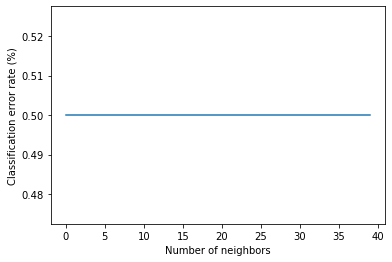

Ran Exercise 6.3.2


In [6]:
# exercise 6.3.2

from matplotlib.pyplot import figure, plot, xlabel, ylabel, show
import numpy as np
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

# Maximum number of neighbors
L=40

CV = model_selection.LeaveOneOut()
errors = np.zeros((N,L))
i=0
for train_index, test_index in CV.split(X, y):
    print('Crossvalidation fold: {0}/{1}'.format(i+1,N))    
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    # Fit classifier and classify the test points (consider 1 to 40 neighbors)
    for l in range(1,L+1):
        knclassifier = KNeighborsClassifier(n_neighbors=l);
        knclassifier.fit(X_train, y_train);
        y_est = knclassifier.predict(X_test);
        errors[i,l-1] = np.sum(y_est[0]!=y_test[0])

    i+=1
    
# Plot the classification error rate
figure()
plot(100*sum(errors,0)/N)
xlabel('Number of neighbors')
ylabel('Classification error rate (%)')
show()

print('Ran Exercise 6.3.2')